### Importation of Libraries

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, roc_curve, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import pickle 
import streamlit as st
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)



#### Data Importation

In [106]:
import pandas as pd
ah = pd.read_csv("loan_data.csv")
ah.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [107]:
ah.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#### Exploring the Dataset

In [108]:
ah.shape

(9578, 14)

In [109]:
ah.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [110]:
ah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [111]:
ah.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### Explorative Data Analysis (EDA)

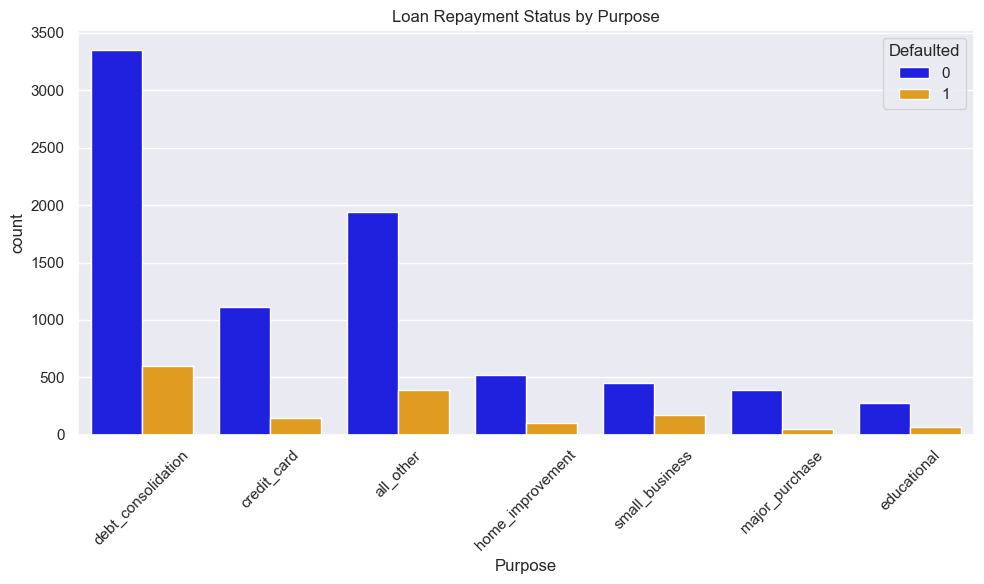

In [112]:
#Creating new DataFrame with mapped values
mapped_data = ah.copy()

#Plotting the visualization of not.fully.paid
plt.figure(figsize=(10, 6))
sns.countplot(data=mapped_data, x='purpose',hue = 'not.fully.paid', palette = { 0: 'blue', 1: 'orange'})
plt.title('Loan Repayment Status by Purpose')
plt.xlabel('Purpose')
plt.ylabel('count')
plt.xticks(rotation = 45)
plt.legend(title = 'Defaulted', loc = 'upper right')
plt.tight_layout()
plt.show()

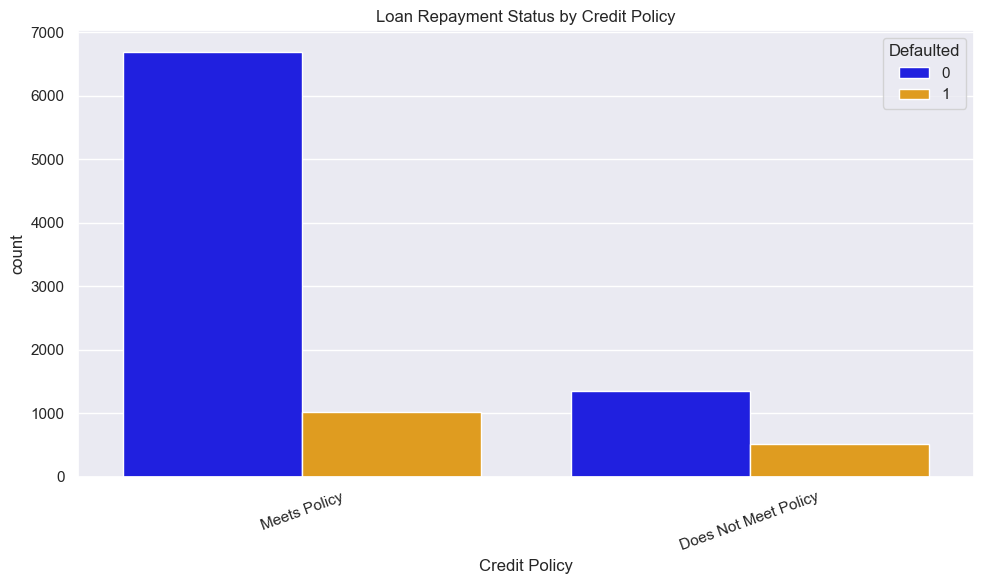

In [113]:
# 'Credit.policy' column to more descriptive labels with mapped values
mapped_data['credit.policy'] = mapped_data['credit.policy'].map({1: 'Meets Policy', 0: 'Does Not Meet Policy'})

# Plotting the visualization for 'credit.policy' and 'not.fully.paid'
plt.figure(figsize=(10, 6))
sns.countplot(data=mapped_data, x='credit.policy', hue='not.fully.paid', palette={0: 'blue', 1: 'orange'})
plt.title('Loan Repayment Status by Credit Policy')
plt.xlabel('Credit Policy')
plt.ylabel('count')
plt.xticks(rotation=20)
plt.legend(title='Defaulted', loc='upper right')
plt.tight_layout()
plt.show()

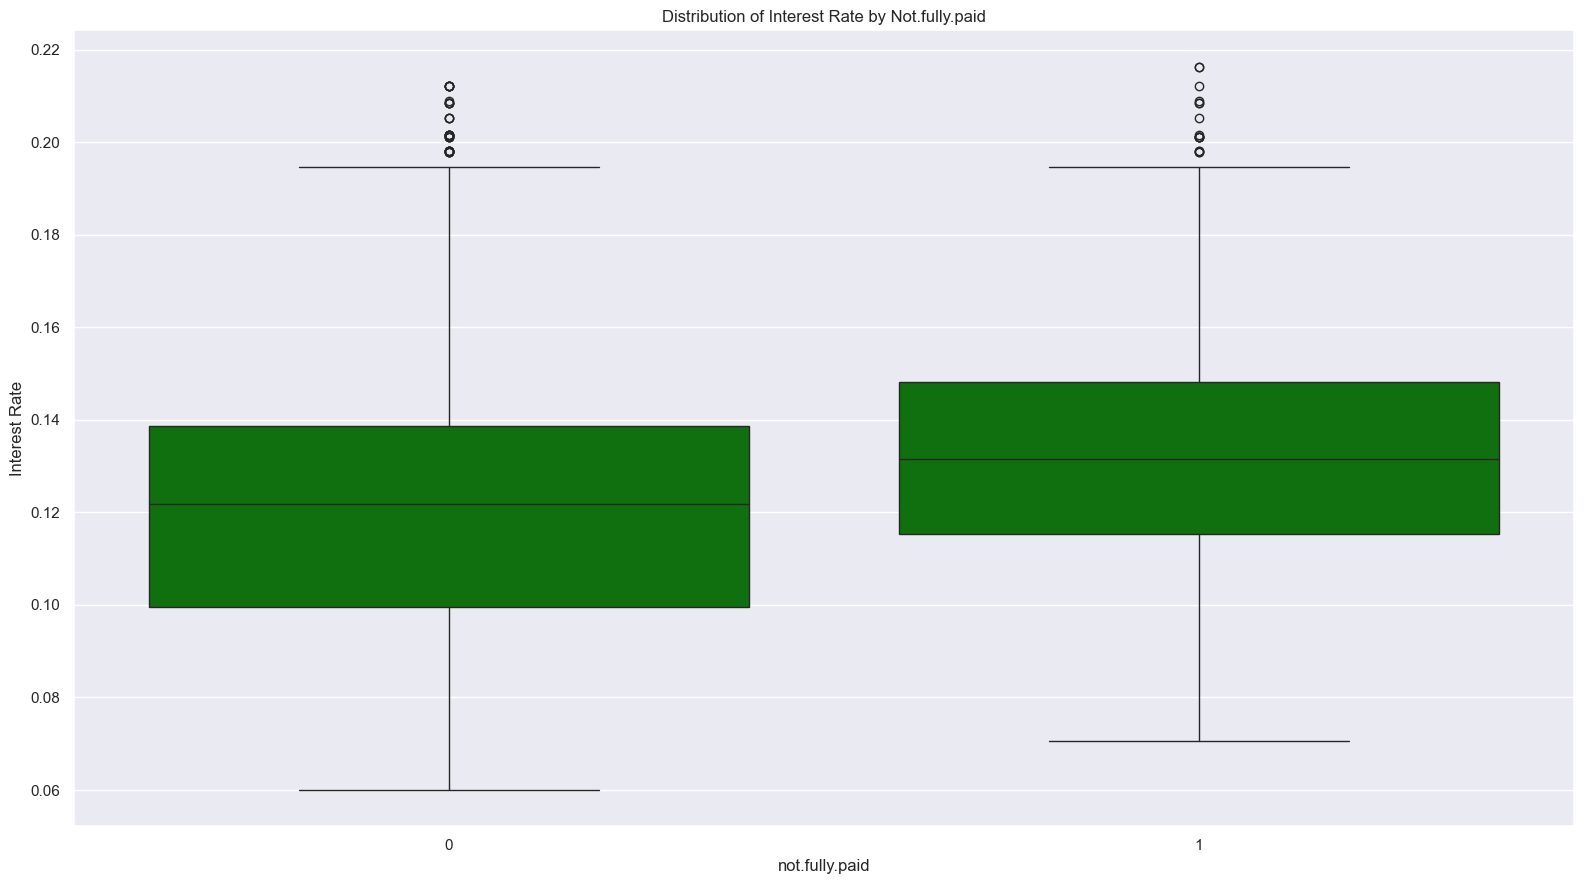

In [114]:
#Boxplot for int.rate
plt.figure(figsize=(16,9))
sns.boxplot(data=ah, y='int.rate', x='not.fully.paid', color='green')
plt.title("Distribution of Interest Rate by Not.fully.paid")
plt.xlabel('not.fully.paid')
plt.ylabel('Interest Rate')
plt.tight_layout()
plt.show()

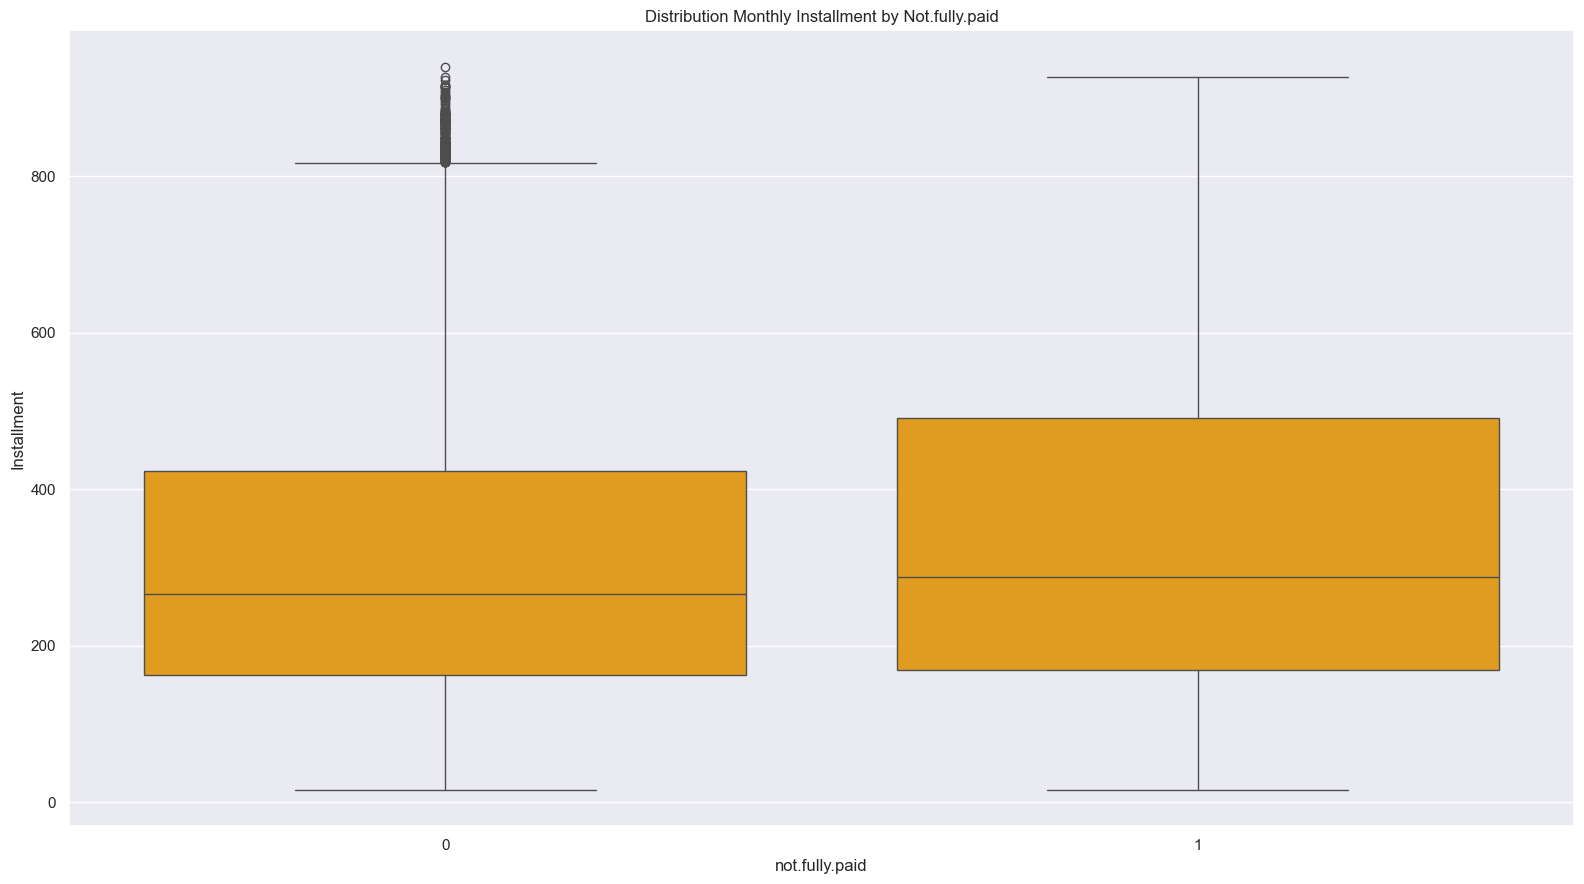

In [115]:
#Boxplot for installment
plt.figure(figsize=(16,9))
sns.boxplot(data=ah, y= 'installment', x='not.fully.paid', color = 'orange')
plt.title("Distribution Monthly Installment by Not.fully.paid")
plt.xlabel('not.fully.paid')
plt.ylabel('Installment')
plt.tight_layout()
plt.show()


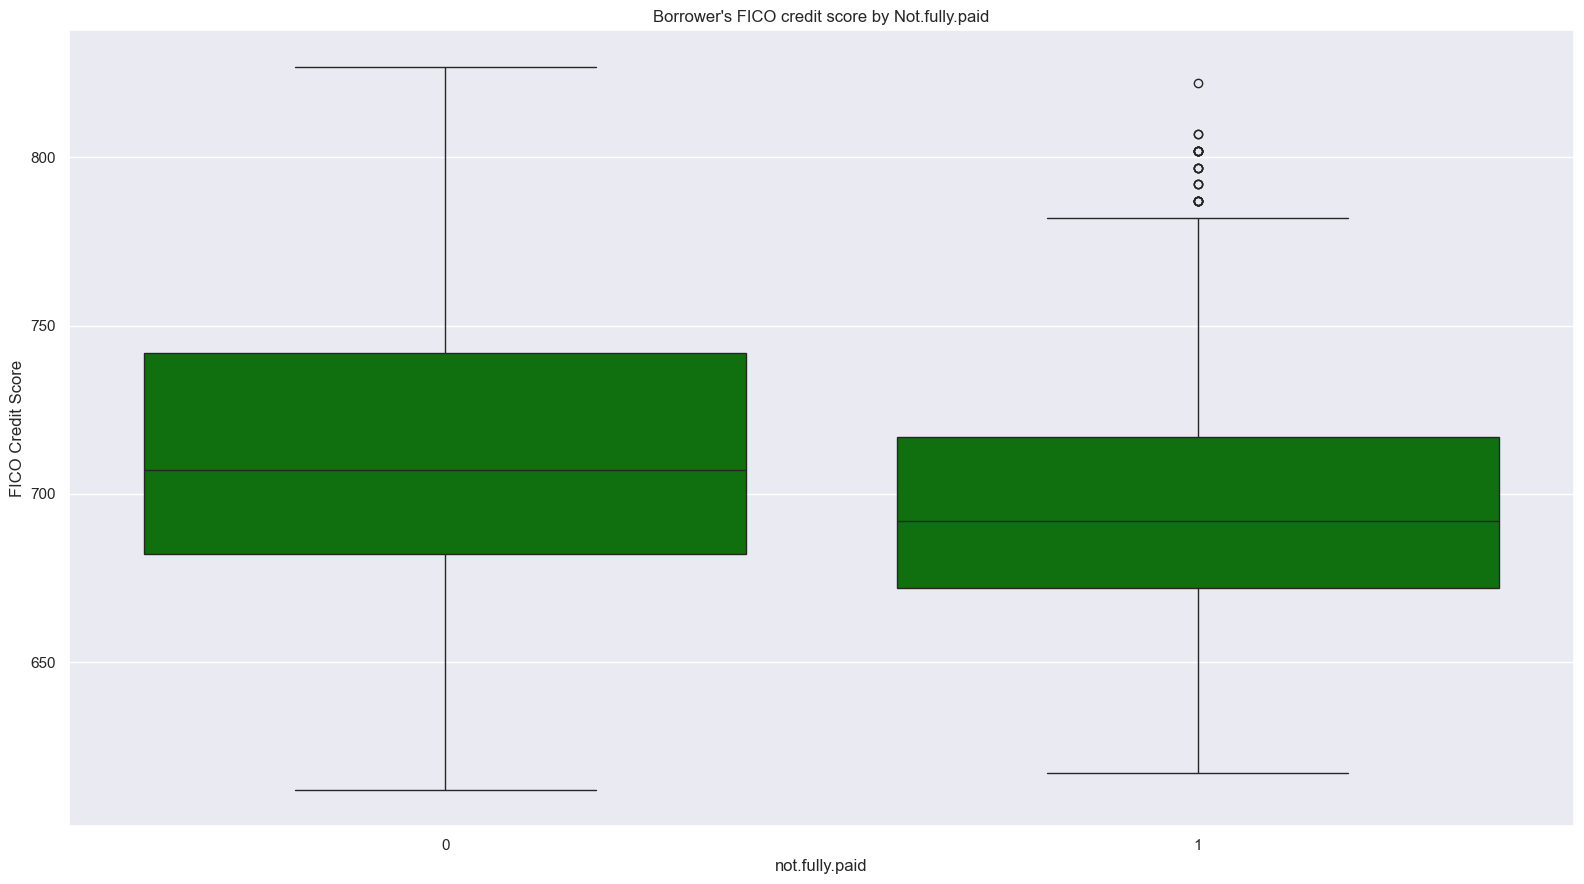

In [116]:
#Boxplot for Fico credit score
plt.figure(figsize=(16,9))
sns.boxplot(data=ah, y= 'fico', x='not.fully.paid', color = 'green')
plt.title("Borrower's FICO credit score by Not.fully.paid")
plt.xlabel('not.fully.paid')
plt.ylabel('FICO Credit Score')
plt.tight_layout()
plt.show()



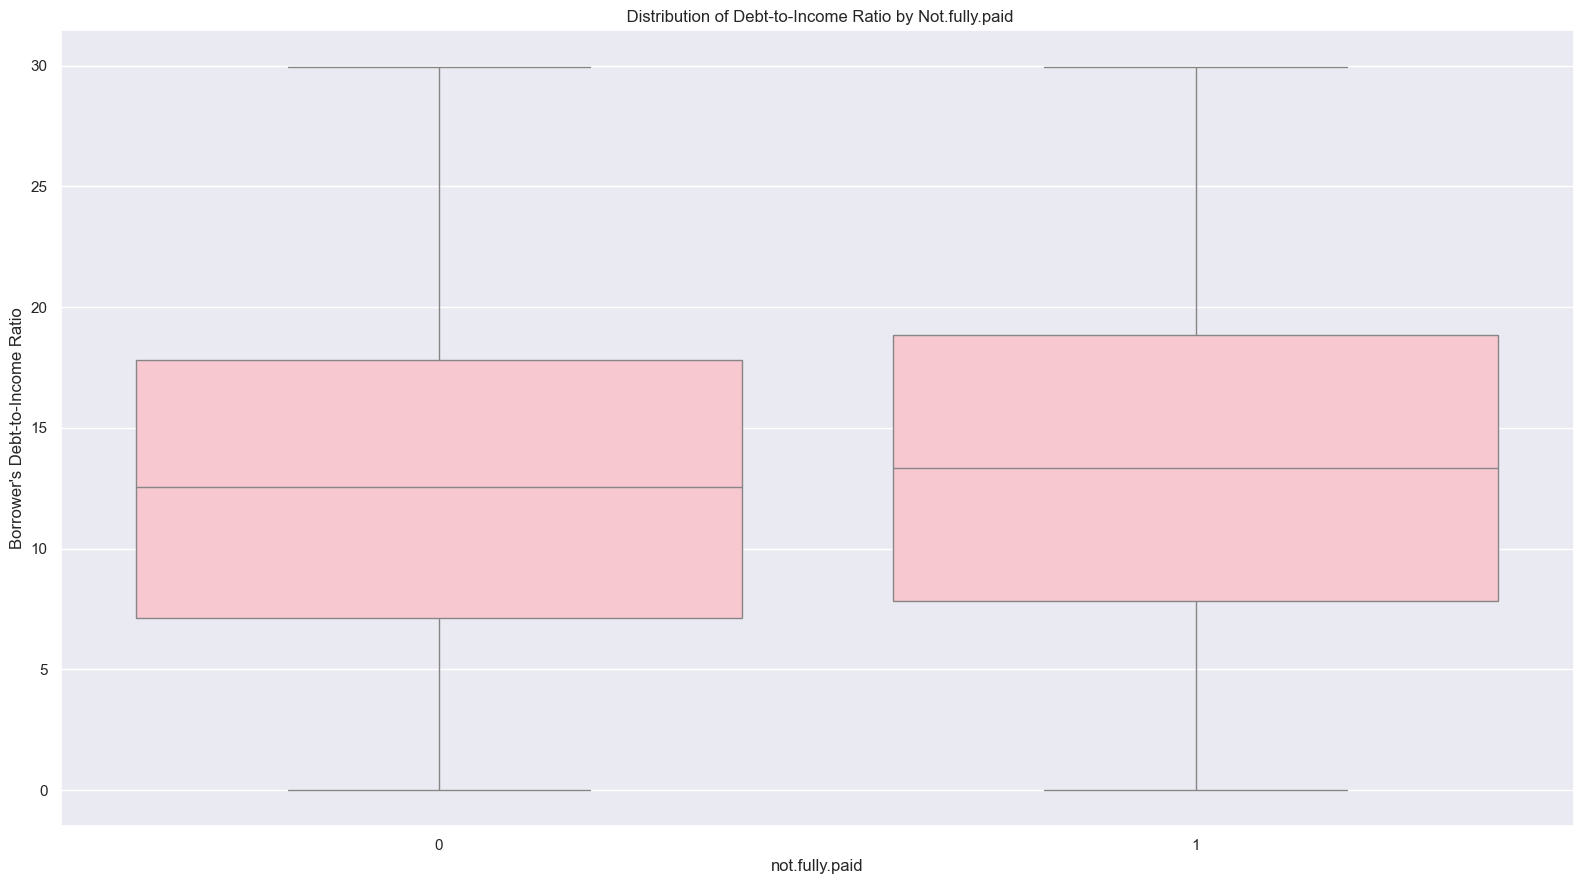

In [117]:
#Boxplot for debt.to.income ratio
plt.figure(figsize=(16,9))
sns.boxplot(data=ah, y='dti', x = 'not.fully.paid',color = 'pink')
plt.title(" Distribution of Debt-to-Income Ratio by Not.fully.paid")
plt.xlabel('not.fully.paid')
plt.ylabel("Borrower's Debt-to-Income Ratio")
plt.tight_layout()


### Data Cleaning

In [118]:

# Spliting the data into train and test sets
train, test = train_test_split(ah, test_size=0.2, random_state=234)
train.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
451,1,all_other,0.0983,241.41,11.066638,0.58,712,5430.000000,603,30.1,0,1,0,0
904,1,debt_consolidation,0.0976,144.70,10.902280,4.24,707,1499.958333,3818,61.6,0,0,0,1
8233,0,credit_card,0.1482,138.31,11.512925,24.79,662,7621.000000,41190,75.2,4,0,0,0
3239,1,debt_consolidation,0.1316,108.07,10.757903,11.00,672,3900.000000,3371,48.2,1,0,0,1
8675,0,all_other,0.0832,56.68,10.736397,0.65,732,809.958333,309,9.1,1,0,0,0


In [119]:
train.shape, test.shape

((7662, 14), (1916, 14))

##### Performing Data Cleaning on the Train Dataset

In [120]:
print(train.duplicated().sum())
print(train.isnull().sum())

0
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


In [121]:
# A1. Resetting the index of the train DataFrame
train.reset_index(drop=True, inplace=True)
train.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,all_other,0.0983,241.41,11.066638,0.58,712,5430.000000,603,30.1,0,1,0,0
1,1,debt_consolidation,0.0976,144.70,10.902280,4.24,707,1499.958333,3818,61.6,0,0,0,1
2,0,credit_card,0.1482,138.31,11.512925,24.79,662,7621.000000,41190,75.2,4,0,0,0
3,1,debt_consolidation,0.1316,108.07,10.757903,11.00,672,3900.000000,3371,48.2,1,0,0,1
4,0,all_other,0.0832,56.68,10.736397,0.65,732,809.958333,309,9.1,1,0,0,0


In [122]:
# A2 Handling Outliers
def drop_outliers(data,column):
    q1, q3 = np.percentile(data[column], [25, 75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    data = data[data[column] < upper]
    data = data[data[column] > lower]
    data.reset_index(drop=True, inplace=True)
    return data


In [123]:
# using the boxplot to find outliers
train = drop_outliers(train, "installment")
train = drop_outliers(train, "fico")
train = drop_outliers(train, "revol.bal")
train = drop_outliers(train, "int.rate")
train = drop_outliers(train, "log.annual.inc")

In [124]:
train.shape


(6677, 14)

In [125]:
train.info

<bound method DataFrame.info of       credit.policy             purpose  int.rate  installment  \
0                 1           all_other    0.0983       241.41   
1                 1  debt_consolidation    0.0976       144.70   
2                 1  debt_consolidation    0.1316       108.07   
3                 0           all_other    0.0832        56.68   
4                 1         credit_card    0.1392       546.20   
...             ...                 ...       ...          ...   
6672              1  debt_consolidation    0.1632       141.26   
6673              1      major_purchase    0.1218       266.40   
6674              1           all_other    0.1183       198.81   
6675              1  debt_consolidation    0.1253       150.60   
6676              0  debt_consolidation    0.1450       688.42   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.066638   0.58   712        5430.000000        603        30.1   
1          10.902

In [126]:
#A3
#Identifying the target and features
target = 'not.fully.paid'
y_train = train[target]
y_train.value_counts()

not.fully.paid
0    5671
1    1006
Name: count, dtype: int64

In [127]:

#Features Variables
x_train = train.drop(target, axis=1)
x_train.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,all_other,0.0983,241.41,11.066638,0.58,712,5430.000000,603,30.1,0,1,0
1,1,debt_consolidation,0.0976,144.70,10.902280,4.24,707,1499.958333,3818,61.6,0,0,0
2,1,debt_consolidation,0.1316,108.07,10.757903,11.00,672,3900.000000,3371,48.2,1,0,0
3,0,all_other,0.0832,56.68,10.736397,0.65,732,809.958333,309,9.1,1,0,0
4,1,credit_card,0.1392,546.20,11.397515,16.51,692,5790.000000,10852,60.9,0,5,0


### Features Engineering

In [128]:
#4 Features Engineering
def credit_utilization(revol_util):
    if revol_util >= 91:
        return 'Critical Risk'
    elif 71 <= revol_util <= 90:
        return 'High Risk'
    elif 51 <= revol_util <= 70:
        return 'Elevated Risk'
    elif 31 <= revol_util <= 50:
        return 'Moderate Risk'
    elif 11 <= revol_util <= 30:
        return 'Low Risk'
    elif 0 <= revol_util <= 10:
        return 'Very Low Risk'
    else:
        return 'Invalid Input'

In [129]:
def fico_category(fico):
  if fico >=  740:
    return 'Excellent'
  elif fico >= 670:
    return 'Good'
  elif fico >= 580:
    return 'Fair'
  else:
    return 'Poor'

In [130]:
#A4
#Monthly Disposable Income
x_train['Monthly_Disposable_Income'] = x_train['log.annual.inc']/ 12 - x_train['installment']

#Year_with_Credit_Line
x_train['Years_with_cr_line'] = (x_train['days.with.cr.line'] / 365).astype(int)

#Revolving balance to income
x_train['revol.bal.to.income'] = (x_train['revol.bal'] / x_train['log.annual.inc']).astype(int)

#Installment-to-income
x_train['installment_to_income'] = (x_train['installment'] / x_train['log.annual.inc'] / 12).astype(int)

#Credit Age (in years)
x_train['Credit_Age'] = x_train['days.with.cr.line'] / 365

#Fico Category
x_train["Fico_category"] = x_train["fico"].apply(fico_category)

#Credit Utilization
x_train["Credit_utilization"] = x_train["revol.util"].apply(credit_utilization)

#Income to Debt Ratio
x_train['Income_to_Debt_Ratio'] = x_train['log.annual.inc'] / (x_train['dti'] * x_train['log.annual.inc']).astype(int)

# Debt consolidation Flag
x_train['debt_consolidation_flag'] = np.where(x_train['purpose']=="debt_consolidation",1,0)

x_train

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,Monthly_Disposable_Income,Years_with_cr_line,revol.bal.to.income,installment_to_income,Credit_Age,Fico_category,Credit_utilization,Income_to_Debt_Ratio,debt_consolidation_flag
0,1,all_other,0.0983,241.41,11.066638,0.58,712,5430.000000,603,30.1,0,1,0,-240.487780,14,54,1,14.876712,Good,Invalid Input,1.844440,0
1,1,debt_consolidation,0.0976,144.70,10.902280,4.24,707,1499.958333,3818,61.6,0,0,0,-143.791477,4,350,1,4.109475,Good,Elevated Risk,0.237006,1
2,1,debt_consolidation,0.1316,108.07,10.757903,11.00,672,3900.000000,3371,48.2,1,0,0,-107.173508,10,313,0,10.684932,Good,Moderate Risk,0.091169,1
3,0,all_other,0.0832,56.68,10.736397,0.65,732,809.958333,309,9.1,1,0,0,-55.785300,2,28,0,2.219064,Good,Very Low Risk,1.789399,0
4,1,credit_card,0.1392,546.20,11.397515,16.51,692,5790.000000,10852,60.9,0,5,0,-545.250207,15,952,3,15.863014,Good,Elevated Risk,0.060625,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6672,1,debt_consolidation,0.1632,141.26,11.482466,20.89,667,5669.958333,34008,98.3,0,0,0,-140.303128,15,2961,1,15.534132,Fair,Critical Risk,0.048044,1
6673,1,major_purchase,0.1218,266.40,9.510445,1.24,747,2549.958333,707,35.3,0,0,0,-265.607463,6,74,2,6.986187,Excellent,Moderate Risk,0.864586,0
6674,1,all_other,0.1183,198.81,10.951095,14.77,722,5280.000000,9107,93.9,0,0,0,-197.897409,14,831,1,14.465753,Good,Critical Risk,0.068019,0
6675,1,debt_consolidation,0.1253,150.60,11.002100,1.12,687,7499.958333,1916,43.5,0,0,1,-149.683158,20,174,1,20.547831,Good,Moderate Risk,0.916842,1


In [131]:
x_train.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,Monthly_Disposable_Income,Years_with_cr_line,revol.bal.to.income,installment_to_income,Credit_Age,Fico_category,Credit_utilization,Income_to_Debt_Ratio,debt_consolidation_flag
0,1,all_other,0.0983,241.41,11.066638,0.58,712,5430.000000,603,30.1,0,1,0,-240.487780,14,54,1,14.876712,Good,Invalid Input,1.844440,0
1,1,debt_consolidation,0.0976,144.70,10.902280,4.24,707,1499.958333,3818,61.6,0,0,0,-143.791477,4,350,1,4.109475,Good,Elevated Risk,0.237006,1
2,1,debt_consolidation,0.1316,108.07,10.757903,11.00,672,3900.000000,3371,48.2,1,0,0,-107.173508,10,313,0,10.684932,Good,Moderate Risk,0.091169,1
3,0,all_other,0.0832,56.68,10.736397,0.65,732,809.958333,309,9.1,1,0,0,-55.785300,2,28,0,2.219064,Good,Very Low Risk,1.789399,0
4,1,credit_card,0.1392,546.20,11.397515,16.51,692,5790.000000,10852,60.9,0,5,0,-545.250207,15,952,3,15.863014,Good,Elevated Risk,0.060625,0


### Multicollinearity Check

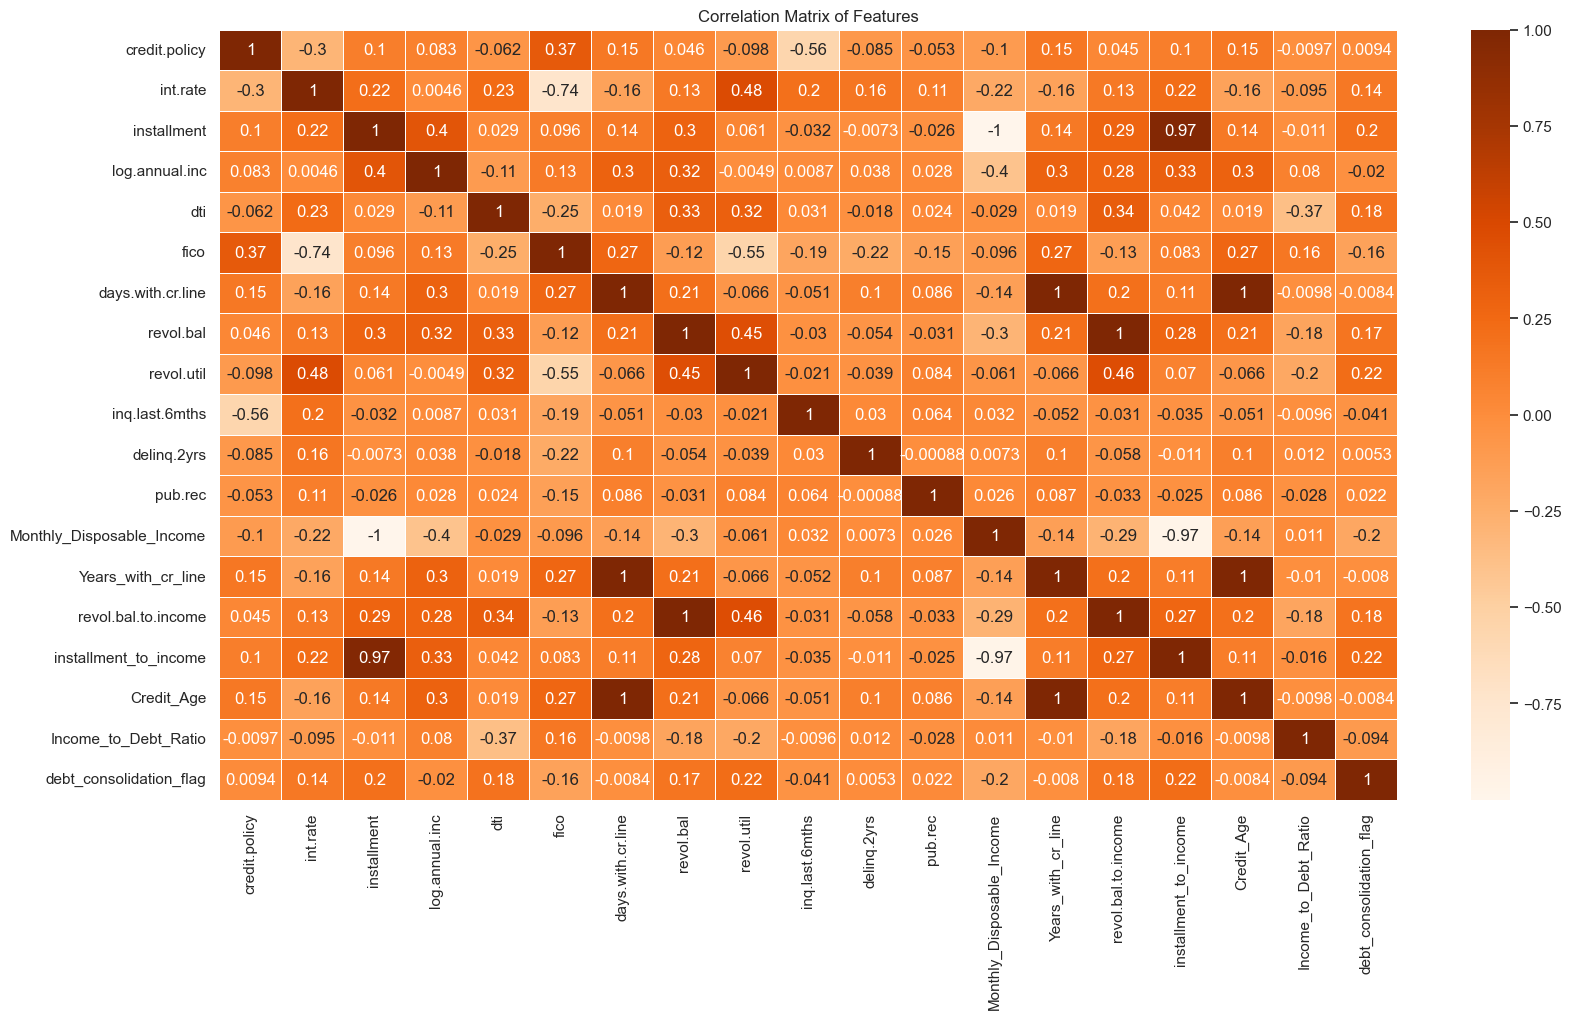

In [132]:
#To calculate the correlation matrix to identify highly correlated features to avoid multicollinearity
# Select only numeric columns for correlation
numeric_x_train = x_train.select_dtypes(include=[np.number])
correlation_matrix = numeric_x_train.corr()
plt.figure(figsize=(19, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Oranges', linewidth=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [133]:
#5 Based on the correlation matrix, we can drop the following columns to avaid multicollinearity:
# 'Monthly_Disposable_Income', 'days.with.cr.line', 'revol.bal'
x_train.drop(columns=['Monthly_Disposable_Income', 'days.with.cr.line', 'revol.bal'], inplace=True)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6677 entries, 0 to 6676
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   credit.policy            6677 non-null   int64  
 1   purpose                  6677 non-null   object 
 2   int.rate                 6677 non-null   float64
 3   installment              6677 non-null   float64
 4   log.annual.inc           6677 non-null   float64
 5   dti                      6677 non-null   float64
 6   fico                     6677 non-null   int64  
 7   revol.util               6677 non-null   float64
 8   inq.last.6mths           6677 non-null   int64  
 9   delinq.2yrs              6677 non-null   int64  
 10  pub.rec                  6677 non-null   int64  
 11  Years_with_cr_line       6677 non-null   int32  
 12  revol.bal.to.income      6677 non-null   int32  
 13  installment_to_income    6677 non-null   int32  
 14  Credit_Age              

### Feature Encoding & Normalization

In [134]:
# 6 Splitting the features into numerical and categorical d

cat_feat =[]
for i in x_train:
    if x_train[i].dtype == 'O' or x_train[i].dtype.name == 'object':
        cat_feat.append(i)

num_feat = []
for i in x_train:
    if x_train[i].dtype == 'int64' or x_train[i].dtype == 'int32' or x_train[i].dtype == 'float64':
        num_feat.append(i)

In [135]:
num_feat

['credit.policy',
 'int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'Years_with_cr_line',
 'revol.bal.to.income',
 'installment_to_income',
 'Credit_Age',
 'Income_to_Debt_Ratio',
 'debt_consolidation_flag']

In [136]:
cat_feat

['purpose', 'Fico_category', 'Credit_utilization']

In [137]:
# 7 Handling infinite values
x_train[num_feat]= x_train[num_feat].replace([np.inf, -np.inf] ,0)
#standardizing the numerical features
scaler = MinMaxScaler()
x_train[num_feat] = scaler.fit_transform(x_train[num_feat])
pickle.dump(scaler, open('scaler.pkl', 'wb'))
x_train[num_feat].head()


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,Years_with_cr_line,revol.bal.to.income,installment_to_income,Credit_Age,Income_to_Debt_Ratio,debt_consolidation_flag
0,1.0,0.286677,0.277149,0.574062,0.019398,0.487805,0.252941,0.000000,0.076923,0.0,0.311111,0.014823,0.166667,0.318721,0.153922,0.0
1,1.0,0.281437,0.158372,0.516289,0.141806,0.463415,0.517647,0.000000,0.000000,0.0,0.088889,0.096075,0.166667,0.080131,0.019779,1.0
2,1.0,0.535928,0.113385,0.465540,0.367893,0.292683,0.405042,0.030303,0.000000,0.0,0.222222,0.085918,0.000000,0.225836,0.007608,1.0
3,0.0,0.173653,0.050269,0.457980,0.021739,0.585366,0.076471,0.030303,0.000000,0.0,0.044444,0.007686,0.000000,0.038242,0.149329,0.0
4,1.0,0.592814,0.651482,0.690367,0.552174,0.390244,0.511765,0.000000,0.384615,0.0,0.333333,0.261323,0.500000,0.340576,0.005059,0.0


In [138]:
# 8 Encoding categorical features
encoder = OneHotEncoder(drop='first', dtype='int')

enc_data = pd.DataFrame(encoder.fit_transform(x_train[cat_feat]).toarray())
enc_data.columns = encoder.get_feature_names_out()

# Drop categorical columns before joining encoded columns to avoid overlap
x_train.drop(cat_feat, axis=1, inplace=True)
x_train = x_train.join(enc_data)
with open('encoder.pkl', 'wb') as f:
	pickle.dump(encoder, f)
x_train.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,Years_with_cr_line,revol.bal.to.income,installment_to_income,Credit_Age,Income_to_Debt_Ratio,debt_consolidation_flag,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,Fico_category_Fair,Fico_category_Good,Credit_utilization_Elevated Risk,Credit_utilization_High Risk,Credit_utilization_Invalid Input,Credit_utilization_Low Risk,Credit_utilization_Moderate Risk,Credit_utilization_Very Low Risk
0,1.0,0.286677,0.277149,0.574062,0.019398,0.487805,0.252941,0.000000,0.076923,0.0,0.311111,0.014823,0.166667,0.318721,0.153922,0.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,1.0,0.281437,0.158372,0.516289,0.141806,0.463415,0.517647,0.000000,0.000000,0.0,0.088889,0.096075,0.166667,0.080131,0.019779,1.0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
2,1.0,0.535928,0.113385,0.465540,0.367893,0.292683,0.405042,0.030303,0.000000,0.0,0.222222,0.085918,0.000000,0.225836,0.007608,1.0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
3,0.0,0.173653,0.050269,0.457980,0.021739,0.585366,0.076471,0.030303,0.000000,0.0,0.044444,0.007686,0.000000,0.038242,0.149329,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,1.0,0.592814,0.651482,0.690367,0.552174,0.390244,0.511765,0.000000,0.384615,0.0,0.333333,0.261323,0.500000,0.340576,0.005059,0.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0


In [139]:
y_train

0       0
1       1
2       1
3       0
4       0
       ..
6672    0
6673    0
6674    0
6675    1
6676    1
Name: not.fully.paid, Length: 6677, dtype: int64

In [140]:
train.duplicated().sum()

0

## Feature Importance

In [141]:
decision_tree = DecisionTreeClassifier(max_depth=10)
decision_tree.fit(x_train, y_train)
predictors = x_train.columns

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values(ascending=False)
coef.to_frame()


,0
log.annual.inc,0.123728
installment,0.104259
Credit_Age,0.103834
revol.bal.to.income,0.092421
int.rate,0.087808
revol.util,0.070888
Income_to_Debt_Ratio,0.063878
credit.policy,0.063466
fico,0.057968
inq.last.6mths,0.051925


In [142]:
#Selecting the top 10 features
res = coef.to_frame()
res.head(10).index

Index(['log.annual.inc', 'installment', 'Credit_Age', 'revol.bal.to.income',
       'int.rate', 'revol.util', 'Income_to_Debt_Ratio', 'credit.policy',
       'fico', 'inq.last.6mths'],
      dtype='object')

In [143]:
top_10=['Credit_Age', 'log.annual.inc', 'int.rate', 'revol.bal.to.income',
       'installment', 'revol.util', 'credit.policy', 'fico', 'inq.last.6mths',
       'Income_to_Debt_Ratio'],
      

In [144]:
#9
res = coef.to_frame()
res.head(10).index
x_train = x_train[top_10[0]]
pickle.dump(x_train, open('feature_top_10.pkl', 'wb'))
x_train.head()

,Credit_Age,log.annual.inc,int.rate,revol.bal.to.income,installment,revol.util,credit.policy,fico,inq.last.6mths,Income_to_Debt_Ratio
0,0.318721,0.574062,0.286677,0.014823,0.277149,0.252941,1.0,0.487805,0.000000,0.153922
1,0.080131,0.516289,0.281437,0.096075,0.158372,0.517647,1.0,0.463415,0.000000,0.019779
2,0.225836,0.465540,0.535928,0.085918,0.113385,0.405042,1.0,0.292683,0.030303,0.007608
3,0.038242,0.457980,0.173653,0.007686,0.050269,0.076471,0.0,0.585366,0.030303,0.149329
4,0.340576,0.690367,0.592814,0.261323,0.651482,0.511765,1.0,0.390244,0.000000,0.005059


### Optimization by Balancing 

In [145]:
y_train.value_counts()

not.fully.paid
0    5671
1    1006
Name: count, dtype: int64

In [146]:
#Balancing the target column using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=234)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
y_train_smote.value_counts()


not.fully.paid
0    5671
1    5671
Name: count, dtype: int64

### Model Training

In [147]:
### MODEL TRAINING
def prepare(d):
    d.reset_index(drop=True, inplace=True)

    # Drop outliers as in train
    def drop_outliers(data, column):
        q1, q3 = np.percentile(data[column], [25, 75])
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        data = data[data[column] < upper]
        data = data[data[column] > lower]
        data.reset_index(drop=True, inplace=True)
        return data

    d = drop_outliers(d, "installment")
    d = drop_outliers(d, "fico")
    d = drop_outliers(d, "revol.bal")
    d = drop_outliers(d, "int.rate")
    d = drop_outliers(d, "log.annual.inc")


    target = "not.fully.paid"
    y_d = d[target]
    x_d = d.drop(target, axis=1)


     # Feature engineering (match train)
    x_d['Monthly_Disposable_Income'] = x_d['log.annual.inc']/ 12 - x_d['installment']

    x_d['Years_with_cr_line'] = (x_d['days.with.cr.line'] / 365).astype(int)

    x_d['revol.bal.to.income'] = (x_d['revol.bal'] / x_d['log.annual.inc']).astype(int)

    x_d['installment_to_income'] = (x_d['installment'] / x_d['log.annual.inc'] / 12).astype(int)

    x_d['Credit_Age'] = x_d['days.with.cr.line'] / 365

    x_d["Fico_category"] = x_d["fico"].apply(fico_category)

    x_d["Credit_utilization"] = x_d["revol.util"].apply(credit_utilization)

    x_d['Income_to_Debt_Ratio'] = x_d['log.annual.inc'] / (x_d['dti'] * x_d['log.annual.inc']).astype(int)
    
    x_d['debt_consolidation_flag'] = np.where(x_d['purpose']=="debt_consolidation",1,0)

    x_d.drop(columns=['Monthly_Disposable_Income', 'days.with.cr.line', 'revol.bal'], inplace=True)

    cat_feat =[]
    for i in x_d:
        if x_d[i].dtype == 'O' or x_d[i].dtype.name == 'object':
         cat_feat.append(i)

    num_feat = []
    for i in x_d:
        if x_d[i].dtype == 'int64' or x_d[i].dtype == 'int32' or x_d[i].dtype == 'float64':
            num_feat.append(i)

    

    # Handling infinite values
    x_d[num_feat] = x_d[num_feat].replace([np.inf, -np.inf], 0)

    enc_data = pd.DataFrame(encoder.transform(x_d[cat_feat]).toarray())
    enc_data.columns = encoder.get_feature_names_out()

    x_d = x_d.drop(cat_feat, axis=1)
    x_d = x_d.join(enc_data)

    # Use the same scaler and encoder as train
    x_d[num_feat] = scaler.transform(x_d[num_feat])

    # Select only the top 10 features (as in train)
    x_d_n = x_d[top_10[0]]

    return x_d_n, y_d

In [148]:
x_test, y_test = prepare(test)

## Model Evaluation

In [149]:
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT' :
        model = DecisionTreeClassifier()
    elif input_ml_algo == 'RF' :
        model = RandomForestClassifier()
    elif input_ml_algo == 'XGBC' :
        model = XGBClassifier()
    elif input_ml_algo == 'LR' :
        model = LogisticRegression()
    elif input_ml_algo == 'KNN' :
        model = KNeighborsClassifier()
    return model

def performance(model, x_train, y_train, x_test, y_test):
    # Predict class labels
    y_pred = model.predict(x_test)

    # Predict probabilities for test dataset
    y_pred_prob = model.predict_proba(x_test)
    y_pred_prob = [x[1] for x in y_pred_prob]

    disp = ConfusionMatrixDisplay.from_estimator(
        model, x_test, y_test,
        cmap='Blues', values_format='d'
    )
    print("\n Accuracy Score : \n", accuracy_score(y_test, y_pred))
    print("\n AUC Score : \n", roc_auc_score(y_test, y_pred_prob))
    print("\n Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
    print("\n Classification Report : \n", classification_report(y_test, y_pred))

    print("\n ROC curve : \n")
    sns.set_style("white")
    roc_curve(y_test, y_pred_prob)
    plt.show()


 Accuracy Score : 
 0.7448316597755463

 AUC Score : 
 0.5348685679205267

 Confusion Matrix : 
 [[1202  243]
 [ 189   59]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      1445
           1       0.20      0.24      0.21       248

    accuracy                           0.74      1693
   macro avg       0.53      0.53      0.53      1693
weighted avg       0.77      0.74      0.75      1693


 ROC curve : 



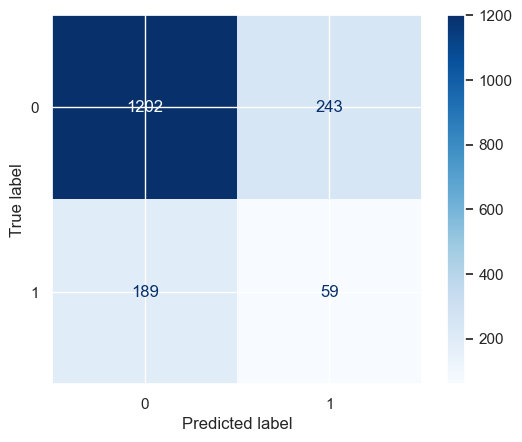

In [150]:
model1 = model_to_use("DT")
model1.fit(x_train_smote, y_train_smote)
performance(model1, x_train_smote, y_train_smote, x_test, y_test)


 Accuracy Score : 
 0.819846426461902

 AUC Score : 
 0.6204138296684898

 Confusion Matrix : 
 [[1359   86]
 [ 219   29]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1445
           1       0.25      0.12      0.16       248

    accuracy                           0.82      1693
   macro avg       0.56      0.53      0.53      1693
weighted avg       0.77      0.82      0.79      1693


 ROC curve : 



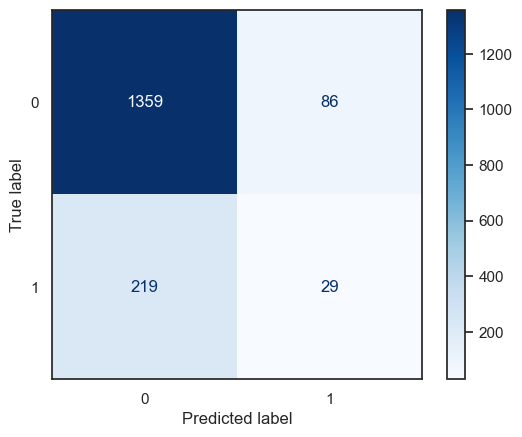

In [151]:
model2 = model_to_use("RF")
model2.fit(x_train_smote, y_train_smote)
performance(model2, x_train_smote, y_train_smote, x_test, y_test)


 Accuracy Score : 
 0.8186650915534555

 AUC Score : 
 0.5802461212188861

 Confusion Matrix : 
 [[1358   87]
 [ 220   28]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1445
           1       0.24      0.11      0.15       248

    accuracy                           0.82      1693
   macro avg       0.55      0.53      0.53      1693
weighted avg       0.77      0.82      0.79      1693


 ROC curve : 



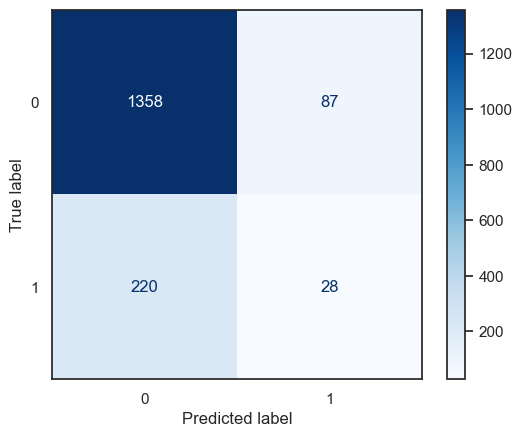

In [152]:
model3 = model_to_use("XGBC")
model3.fit(x_train_smote, y_train_smote)
performance(model3, x_train_smote, y_train_smote, x_test, y_test)


 Accuracy Score : 
 0.6202008269344359

 AUC Score : 
 0.6534295122223464

 Confusion Matrix : 
 [[899 546]
 [ 97 151]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.62      0.74      1445
           1       0.22      0.61      0.32       248

    accuracy                           0.62      1693
   macro avg       0.56      0.62      0.53      1693
weighted avg       0.80      0.62      0.68      1693


 ROC curve : 



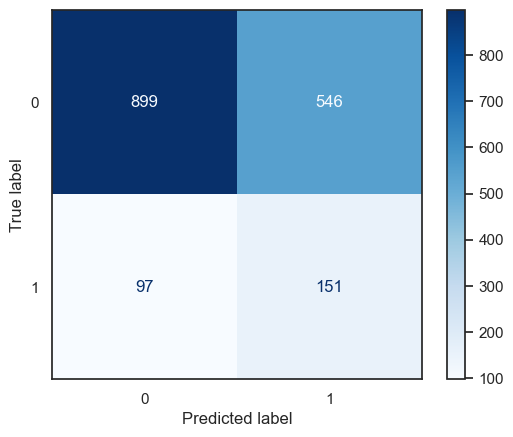

In [153]:
model4 = model_to_use("LR")
model4.fit(x_train_smote, y_train_smote)
performance(model4, x_train_smote, y_train_smote, x_test, y_test)


 Accuracy Score : 
 0.616066154754873

 AUC Score : 
 0.5634055140082599

 Confusion Matrix : 
 [[933 512]
 [138 110]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.65      0.74      1445
           1       0.18      0.44      0.25       248

    accuracy                           0.62      1693
   macro avg       0.52      0.54      0.50      1693
weighted avg       0.77      0.62      0.67      1693


 ROC curve : 



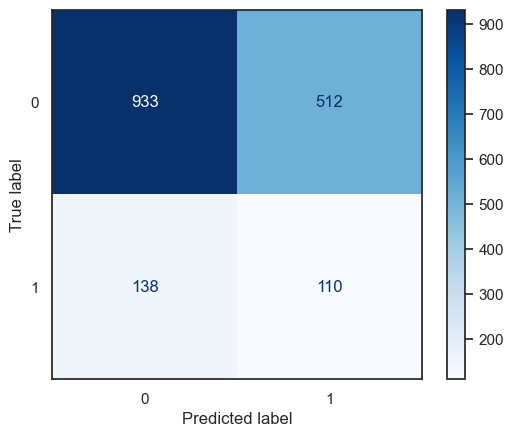

In [154]:
model5 = model_to_use("KNN")
model5.fit(x_train_smote, y_train_smote)
performance(model5, x_train_smote, y_train_smote, x_test, y_test)

In [155]:
#Saving the best model
best_model = model4
with open('Digital lenders.pkl', 'wb') as f:
	pickle.dump(best_model, f, protocol=4)
print("Model saved successfully")

Model saved successfully
